### Introduction to Deep Learning
- Deep Learning (DL) is a ML technique that uses deep neural networks (DNN's) as models.

- A deep neural network is a model inspired by animal brains. It's composed of interconnected nodes (or neurons) arranged in layers which process a signal (a real number) and send it to other node layers, until the signal reaches an output layer and the final result can be obtained.

- Depending on the structure of the connections and the nature of the operations, DNN's can be classified into many subtypes (multilayer perceptrons, convolutional neural networks, recursive neural networks, etc).

- So far, we've only seen techniques that deal with tabular data; data which fits neatly into tables. But not all data can fit into tables, and not all techniques with good results for tabular data can be used on non-tabular data. This is where DL comes in.

- DL can be used for both regression and classification problems that deal with non-tabular data such as images, video, audio,etc. DNN's have been proven to be very reliable models that have pushed the ML field forward, but they're very complex and hard to train.

#### Fashion Classification
- We'll shift our focus to image data for a multi-class classification project, leveraging neural networks. Specifically, we will build a fashion classification service that allows users to upload an image and receive its category in return (e.g., T-shirts). 

- The dataset we'll use is a subset of the clothing dataset, featuring its 10 most popular classes.
- The training dataset is organized into 10 folders, each named after a category and containing the corresponding images. Since the dataset has already been split, no need to perform train-test-validation splits.

#### TensorFlow and Keras
- Introduction
- TensorFlow is a library for ML and AI. Keras is a library that provides a Python interface for TensorFlow, making it simpler to use. Keras used to be an independent library but has been absorved into TensorFlow.

- Installing TensorFlow: Use 'pip intall tensorflow' in the powershell
- Loading Image

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Tensorflow and Keras related Liberaries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

#### Loading any image from the Trained folder of the Cloned Dataset

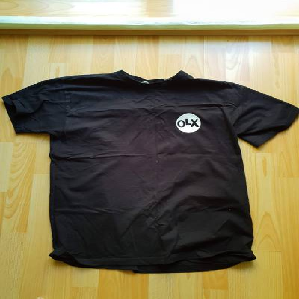

In [3]:

path = r"C:\Users\g\Machine-Learning-1st-Assigmnment\clothing-dataset-small\train\t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = fr"{path}\{name}"

img = load_img(fullname, target_size=(299, 299))
img

When loading an image with load_img(), the resulting object is a PIL image. PIL stands for Python Image Library; PIL used to be a library but it was abandoned and nowadays the Pillow library is used instead, but the image format is the same.

A PIL image object is essentially an array. In the case of color images, a PIL image will have 3 channels, one for each RGB color. A channel is a matrix where each component represents a pixel, and its value ranges from 0 to 255 (1 byte). Thus, a pixel is composed of 3 different values, one for each elemental color, and these values are found in the same position in the 3 matrices.

Neural networks that deal with images expect the images to all have the same size. target_size inside load_img() allows us to define a final size in pixels for the converted image, as in load_img(target_size=(299, 299)).

The final size of the PIL image can be calculated as (h, w, c), where h is the height of the image, w is the width and c is the number of channels in the image.

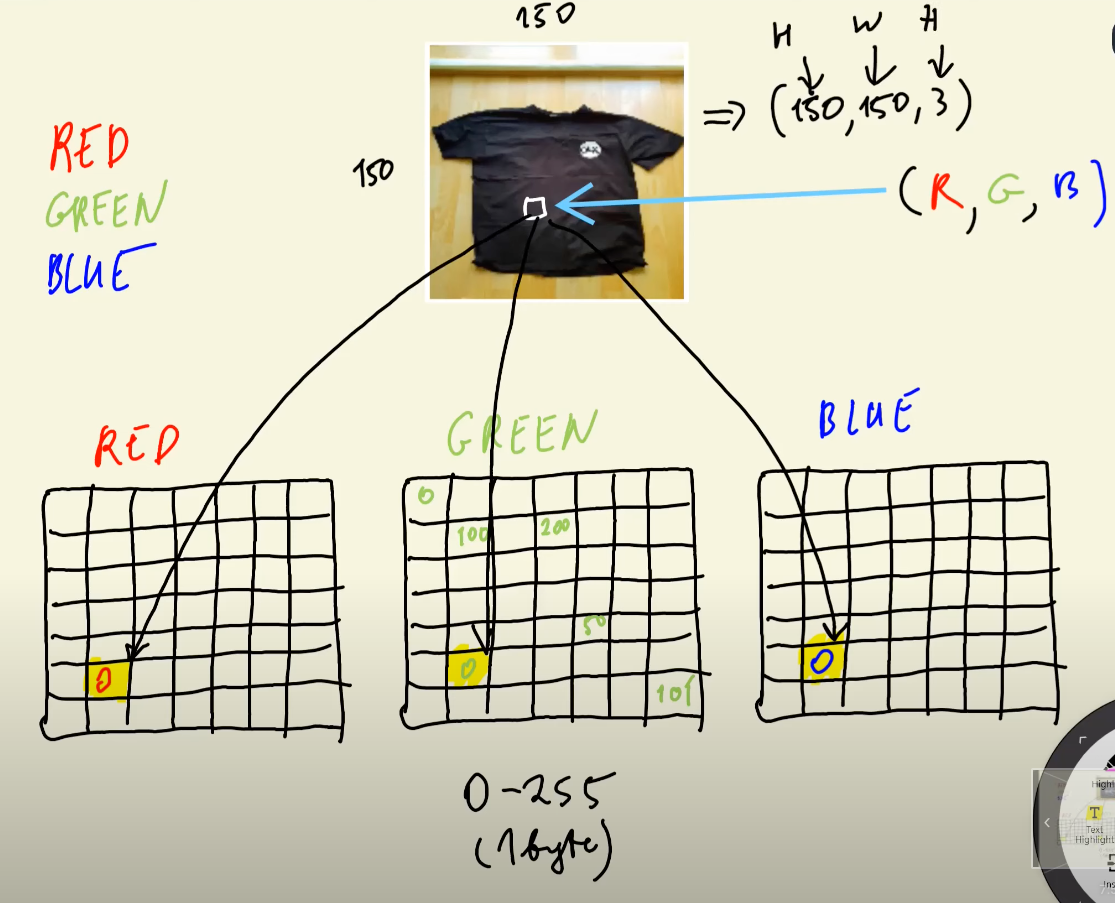

In [4]:
# PIL images can easily be converted to NumPy arrays of dtype=uint8 (unsigned integers of size 8 bits):

x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

#### Pre-trained convolutional neural networks
Instead of training a DNN from scratch, we can use a pre-trained network in order to speed up work. There are many pre-trained networks available online.

The standard training dataset for general image classification is ImageNet, a dataset with over a million images in 1000 different categories.

For this example we will use a Xception network pre-trained on ImageNet.

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/


In [5]:
# Import Xception model and utilities
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions


In [ ]:

# Use keyword argument format
model = Xception(weights='imagenet', input_shape=(299, 299, 3)) 

In [7]:
# Create batch (single image batch)
X = np.array([x])  # Add batch dimension

# Preprocess input
X = preprocess_input(X)

# Make prediction
pred = model.predict(X)

# Decode predictions
decode_predictions(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


[[('n03595614', 'jersey', np.float32(0.6819633)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140032)),
  ('n04370456', 'sweatshirt', np.float32(0.034324802)),
  ('n03710637', 'maillot', np.float32(0.011354214)),
  ('n04525038', 'velvet', np.float32(0.0018453582))]]

We instantiate a Xception network with pre-trained weights on the ImageNet dataset. We also specify a specific input shape that all input images must have; in this example, images will be of size 299x299 pixels with 3 channels (RGB color).

Xception takes a batch of images as input. A batch is an array that contains images. The first dimension of this array contains the number of images, so if we were to input 5 images, we'd need an array of size (5, 299, 299, 3).

Since we only have a single image to use as input, we need to wrap it inside a batch. np.array([x]) takes x of size (299, 299, 3), puts it inside a list with it as its single element and is then converted to a NumPy array, which results in an array of size (1, 299, 299, 3).

Xception also expects all images to have been preprocessed in a specific way. The Xception implementation in Keras provides a preprocess_input() function that takes a batch of images and 
preprocesses them in the format that Xception expects.

Essentially, it converts the original integer values in the [0,255] range to real values in the [-1, 1] range.

- model.predict() returns an array with 1000 values for each input image. Each value is the probability that the input image belongs to one of the 1000 categories in ImageNet.

- decode_predictions() is a convenient translation function that converts the prediction probabilities to human-readable output, in order to understand the categories.

- Pre-trained DNN's are useful for speeding up work, but they may have been pretrained for tasks that do not match our needs. For example, if we want to work with Fashion-MNIST, a dataset that contains images of clothing, and we want to correctly classify images of T-shirts, we cannot use the code above because ImageNet does not have a T-shirt category, and we end up classifying a T-shirt picture as a jersey, a sweatshirt or even a bulletproof vest.

#### Convolutional Neural Networks
A Convolutional Neural Network (CNN) is a type of DNN that is well suited for dealing with images. The Xception network used in the previous section is an example of CNN.

CNN's have 2 type of layers: convolutional and dense, as well as a special type called pooling:

- A convolutional layer (CL) is made of "filters": matrices that recognize specific patterns. The filters move accross the image and create an output consisting of a "similarity array", or a filtered image where every "region" has a higher value the more similar it is to the filter. These outputs are called feature maps.

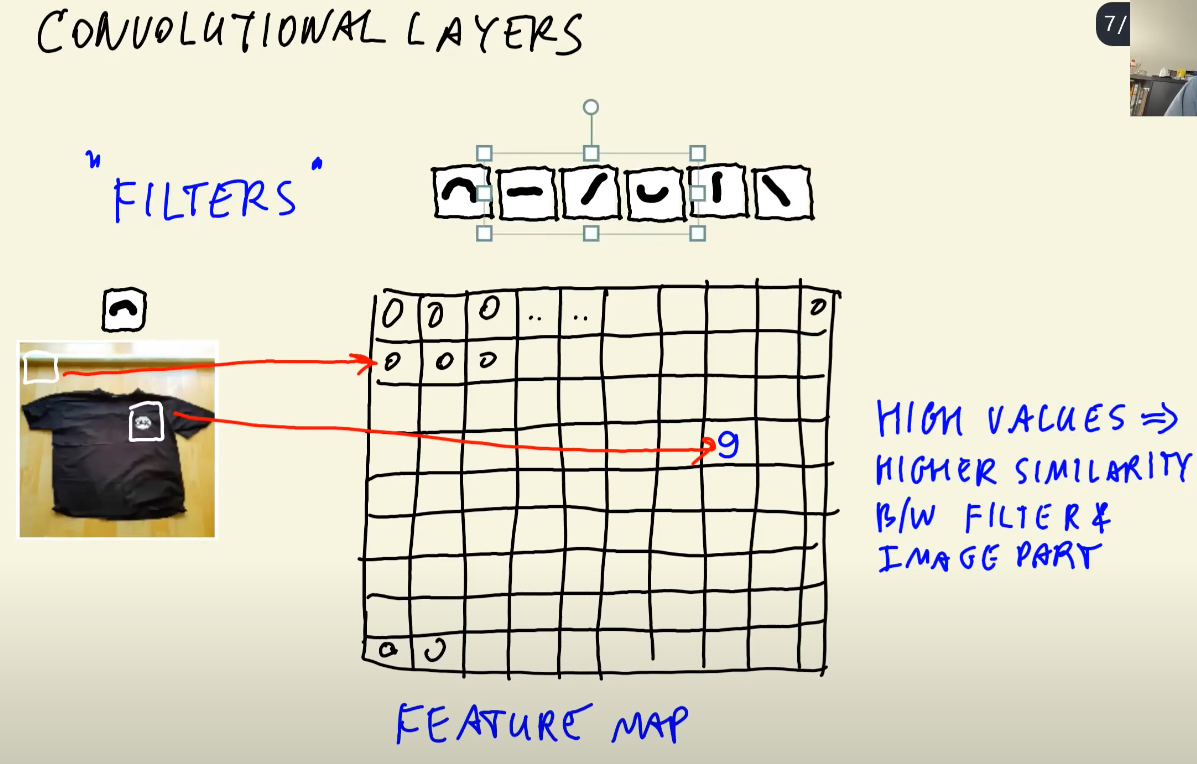

- Each filter will output a feature map, so the output of the convolutional layer will have as many feature maps as filters.
- These feature maps are then passed to another convolutional layer with its own set of filters, which will output another set of feature maps, which can then be sent to another CL, and so on. For example, a CL with 6 filters will output 6 feature maps, which will then be fed to another CL with 12 filters, thus outputting 12 feature maps.

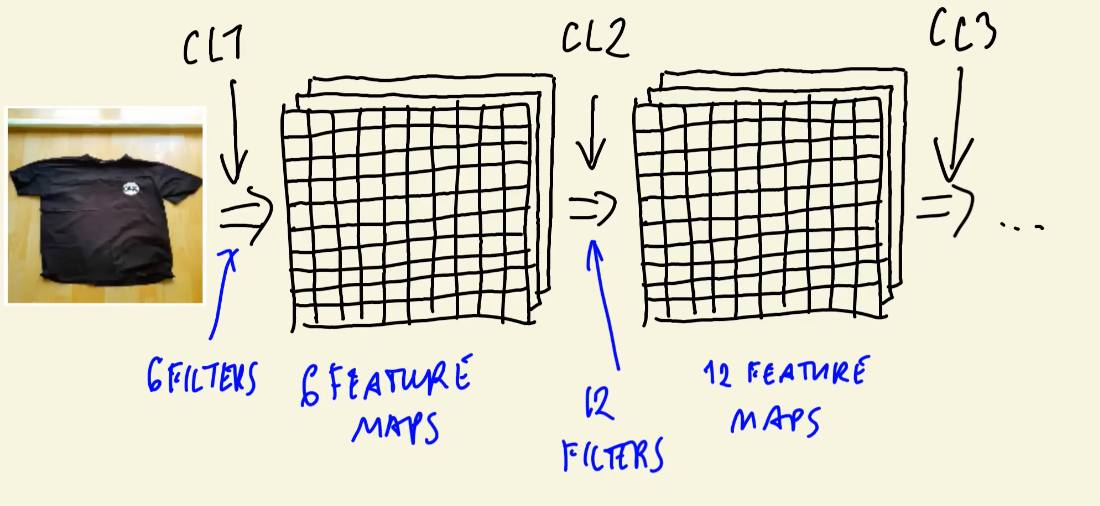
- The filters on each CL are increasingly complex, thus allowing us to recognize complex patterns. An early CL might recognize simple shapes such as lines, but a later CL might recognize more complicated shapes such as squares or circles, and so on.

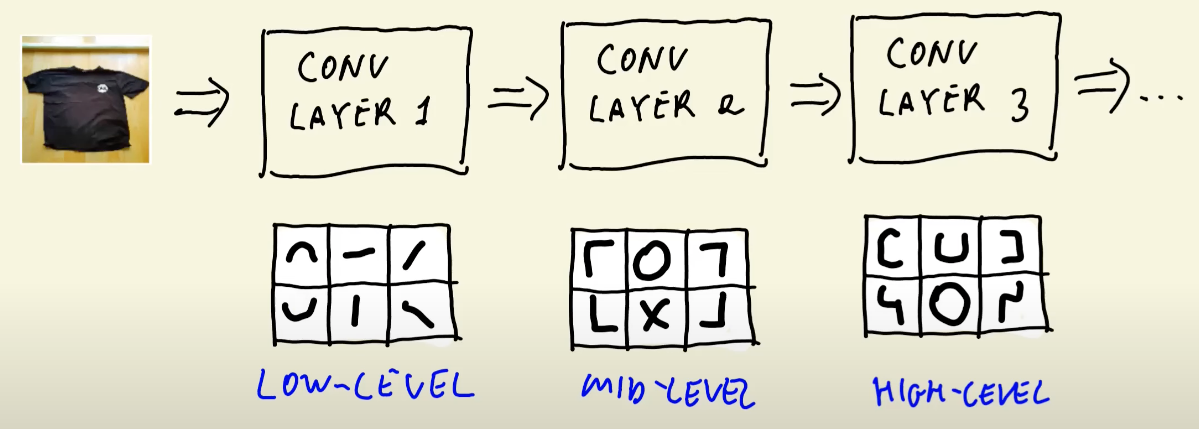

- Filters are learned; they are not predefined. Training a CNN means training the filters.
- A final CL will usually output a flat 1-D vector. For example, our (299, 299, 3) image could be converted to a (2048) vector. This vector is called a vector representation of the original image.
- A pooling layer is a special type of layer that is used along with convolutional layers. It essentially reduces the size of the feature maps, thus reducing the amount of parameters we need to deal with.
- Pooling layers don't hawe weights that need to be trained. They just apply a simple operation on the feature maps, usually average or max values.
- The main hyperparameter in pooling layers is the pooling window size, which specifies the area of the image in which the pooling operation will take place.
For example, a max pooling layer with a pooling window of size (2,2) will take a 2x2 section of the image, keep the max value and discard the rest. This layer will eventually output a feature map whose sides have been halved in size.
- A dense layer is made of nodes (or neurons) that apply linear and non-linear transformations to the input.
Each node takes each component of the input and applies a linear transformation to them (multiplies each value with a weight, then adds all the elements together along with an optional bias, the node's own weight), which results in an output in the form of a single scalar. The output then goes through an activation function (a non-linear transformation).
- The outputs of a dense layer before going into its activation function are called logits.
Multiple nodes generate multiple outputs. Thus, the output of a dense layer is a vector.
- For binary classification, we could create a single deep layer with a single neuron that takes the vector representation of an image as input and outputs a single value. This value could then go through a sigmoid activation function, which transforms the output to a value in the range [0,1]. Thus, we get the probabilty that the image belongs to the category we want.